In [15]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [9]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [10]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [12]:
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [13]:
fish_target = fish['Species'].to_numpy()

In [14]:
fish_target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [20]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [31]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [34]:
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [38]:
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [43]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
distances, train_target[indexes]

(array([[0.20774583, 0.24862983, 0.33682411]]),
 array([['Roach', 'Perch', 'Perch']], dtype=object))

In [44]:
print(distances)

[[0.20774583 0.24862983 0.33682411]]


### 로지스틱 회귀
* k-nighbors를 사용해서 확률값이 0, 0.333, 0.666, 1이 나와 문제라고 한다.  
  -> 잘 이해가 가지는 않는다.
* 로지스틱 회귀를 사용해보자

* 로지스틱회귀(Logistic regressionㅇ)은 이름은 회귀이지만 분류모델이다.
* 선형회귀와 동일하게 선형 방정식을 학습한다.  
z = a*(Weight) + b*(Length) + c*(Diagonal) + d*(Height) + e*(Width) + f
  
* 여기서 a, b, c, d, e는 가중치 혹은 계수이다. 특성은 늘어났지만 3장에서 다룬 다중 회귀를 위한 선형 방정식과 같다.


** 여기서, z 값은 - ~ +, 즉 음수에서 양수 어떤한 값도 가질 수 있다.
그래서 z 값을 확률값(0~1) 값을 갖게 하귀 위해 Sigmoid function(시그모이드함수) 또는 Logisitc function을 사용한다.

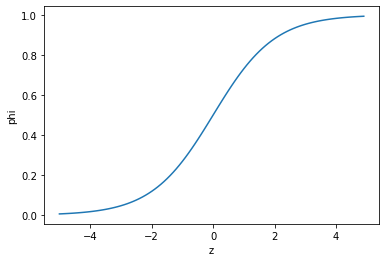

In [54]:
# sigmoid
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

# 로지스틱 회귀로 이진 분류 수행하기

## 빙어와 도미만 분류해서 이진 분류 수행해보기

### 빙어와 도미만 분류

In [65]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])

# Boolean indexing으로 A와 C만 반환하기
char_arr[[True, False, True, False, False]]

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
len(train_bream_smelt), len(train_scaled)

(33, 119)

### logistic regression

In [66]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [71]:
lr.predict(train_bream_smelt[:10])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream'], dtype=object)

In [72]:
target_bream_smelt[:10]

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream'], dtype=object)

In [73]:
lr.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [75]:
# 어느부분이 음성클래스인지 양성클래스인지 확인해보기

lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [77]:
# logisticRegression의 계수 확인

lr.coef_, lr.intercept_

(array([[-0.4037798 , -0.57620209, -0.66280298, -1.01290277, -0.73168947]]),
 array([-2.16155132]))


즉, z = -0.404*(weight) -0.576*(length) -0.663*(diagonal) -1.013*(height) -0.732*(width) -2.161

In [78]:
# logistic regression의 z값 계산

decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [93]:
1/(np.exp(-decisions) + 1)

array([0.00240145, 0.97264817, 0.00513928, 0.01415798, 0.00232731])

In [94]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


# LogisticRegressiond으로 다중 분류

In [104]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [107]:
print(lr.predict(test_scaled[:5]))
print(test_target[:5])

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch']


In [109]:
proba = lr.predict_proba(test_scaled[:5])
print(lr.classes_)
print(np.round(proba, decimals=3))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [115]:
print(lr.coef_.shape, lr.intercept_.shape)
print('(계수 : "7개의 클래스, 5개의 특성")', '(절편 : "7개의 클래스")')

(7, 5) (7,)
(계수 : "7개의 클래스, 5개의 특성") (절편 : "7개의 클래스")


In [119]:
print(lr.coef_[0], lr.intercept_[0])

[-1.48987946 -1.02990924  2.59435576  7.70317359 -1.20033012] -0.09215518009192133


### softmax function 사용하기

In [128]:
# decision_functino의 결과값 : z값

decision = lr.decision_function(test_scaled[:5])
print("z값: ")
print(np.round(decision, decimals=2))

z값: 
[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [129]:
expit(decisions)

array([0.00240145, 0.97264817, 0.00513928, 0.01415798, 0.00232731])

In [122]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [125]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [168]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


# 헷갈리는 내용

In [140]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])

# Boolean indexing으로 A와 C만 반환하기
char_arr[[True, False, True, False, False]]

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
len(train_bream_smelt), len(train_scaled)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [141]:
print('weight, length, diagonal, height, width')
train_bream_smelt[0]

weight, length, diagonal, height, width


array([0.91965782, 0.60943175, 0.81041221, 1.85194896, 1.00075672])

In [149]:
lr.coef_, lr.intercept_

(array([[-0.4037798 , -0.57620209, -0.66280298, -1.01290277, -0.73168947]]),
 array([-2.16155132]))

In [160]:
z=0
for i in range(5) :
    z += train_bream_smelt[0][i]*lr.coef_[0][i]
z + lr.intercept_[0]

-6.029277435361275

## 결국, lr의 선형함수는 양성일 때의 값만 나타낸다.
## decision_function는 양성값이고 -> sigmoid -> 확률값이 나오게된다
## 이 확률값을 표현한게 lr.predict_proba이고 이건 양성을 기반으로 음성(1-양성)을 표현해낸다.

In [163]:
lr.decision_function(train_bream_smelt[:1])

array([-6.02927744])